In [69]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
dataset = load_iris()
targets = dataset.target_names
print("class:number")
for i in range(len(targets)):
    print(targets[i],":",i)
x_train, x_test, y_train, y_test = train_test_split(dataset["data"], dataset["target"])
kn = KNeighborsClassifier(1)
kn.fit(x_train,y_train)

for i in range(len(x_test)):
    x_new = np.array([x_test[i]])
    predict = kn.predict(x_new)
    print(f"actual {y_test[i]} {targets[y_test[i]]} predicted {predict} {targets[predict]}")

print("accuracy",kn.score(x_test,y_test))



class:number
setosa : 0
versicolor : 1
virginica : 2
actual 0 setosa predicted [0] ['setosa']
actual 0 setosa predicted [0] ['setosa']
actual 1 versicolor predicted [1] ['versicolor']
actual 0 setosa predicted [0] ['setosa']
actual 2 virginica predicted [2] ['virginica']
actual 2 virginica predicted [2] ['virginica']
actual 0 setosa predicted [0] ['setosa']
actual 2 virginica predicted [2] ['virginica']
actual 0 setosa predicted [0] ['setosa']
actual 2 virginica predicted [2] ['virginica']
actual 1 versicolor predicted [1] ['versicolor']
actual 1 versicolor predicted [1] ['versicolor']
actual 1 versicolor predicted [1] ['versicolor']
actual 1 versicolor predicted [1] ['versicolor']
actual 2 virginica predicted [2] ['virginica']
actual 2 virginica predicted [2] ['virginica']
actual 0 setosa predicted [0] ['setosa']
actual 2 virginica predicted [1] ['versicolor']
actual 1 versicolor predicted [1] ['versicolor']
actual 0 setosa predicted [0] ['setosa']
actual 0 setosa predicted [0] ['seto

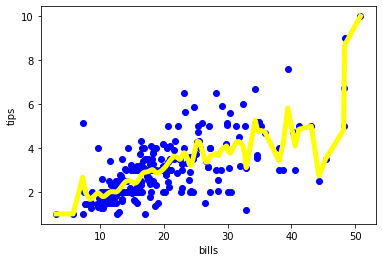

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wt = kernel(point, xmat, k)
    W = (X.T*(wt*X)).I*(X.T*wt*ymat.T)
    return W

def lwr(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred = np.zeros((m))
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)
    return ypred


data=pd.read_csv('../data/data10_tips.csv')
bills = np.array(data.total_bill)
tips = np.array(data.tip)

mbill = np.mat(bills)
mtips = np.mat(tips)

cosl = np.shape(mtips)[1]

ones = np.ones((1, cosl),dtype=int)
X = np.hstack((ones.T,mbill.T))

ypred = lwr(X,mtips,0.5)
xscore = X.copy()
xscore.sort(0)

plt.scatter(bills,tips,color='blue')
plt.plot(xscore[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('bills')
plt.ylabel('tips')
plt.show()

In [33]:
def astar(start,end):
    open_set = set(start)
    close_set = set()
    g = {}
    g[start] = 0
    parents = {}
    parents[start] = start
    
    
    while len(open_set) >0:
        n = None
        for v in open_set:
            if n== None or g[v] + h(v) < g[n] + h(n):
                n=v
        
        if n == end or Graph_nodes[n] == None:
            pass
        else:    
            for  (m,weights) in getN(n):
                if m not in open_set and m not in close_set:
                    g[m] = g[n] + weights
                    parents[m] = n
                    open_set.add(m)
                else:
                    if g[m] > g[n] + weights:
                        g[m] = g[n] + weights
                        parents[m] = n
                    
                    if m in close_set:
                        close_set.remove(m)
                        open_set.add(m)
            if n == None:
                print("path not found")
                return None
        if n == end:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start)
            path.reverse()
            print("path",path)
            return
        open_set.remove(n)
        close_set.add(n)
    print("404")
    return   



def getN(n):
    if  n in Graph_nodes:
        return Graph_nodes[n]
    else:
        return None

def h(n):
    H_dict = {
        'A':1,
        'B':1,
        'C':1,
        'D':1
    }
    return H_dict[n]

Graph_nodes = {
    'A':[('B',1),('C',3),('D',7)],
    'B':[('D',5)],
    'C': [('D', 12)]
}
astar('A','D')


path ['A', 'B', 'D']


In [50]:
import numpy as np

X = np.array(((2,9),(1,5),(3,6)),dtype='float')
Y = np.array(([0.92],[0.86],[0.89]),dtype='float')
X = X/np.amax(X,0)

def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def derivate_sigmoid(x):
    return x*(1-x)

epoch = 7000
lr =0.1
input_layer = 2
hidden_layer =3
output_layer=1

wh = np.random.uniform(size=(input_layer,hidden_layer))
bh = np.random.uniform(size=(1,hidden_layer))
wout = np.random.uniform(size=(hidden_layer, output_layer))
bout = np.random.uniform(size=(1, output_layer))


for i in range(epoch):
    hinp1 = np.dot(X,wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    
    outinp1= np.dot(hlayer_act,wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    
    EO = Y - output
    outgrad = derivate_sigmoid(output)
    d_output = EO * outgrad
    
    EH = d_output.dot(wout.T)
    hiddengrad = derivate_sigmoid(hlayer_act)
    d_hidden = EH* hiddengrad
    
    wout += hlayer_act.T.dot(d_output) * lr
    bout += np.sum(d_output,axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hidden)

print("Input: \n" + str(X))
print("Actual Output: \n" + str(Y))
print("Predicted Output: \n", output)
    


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89599309]
 [0.87886579]
 [0.8941133 ]]


Text(0, 0.5, 'Petal width')

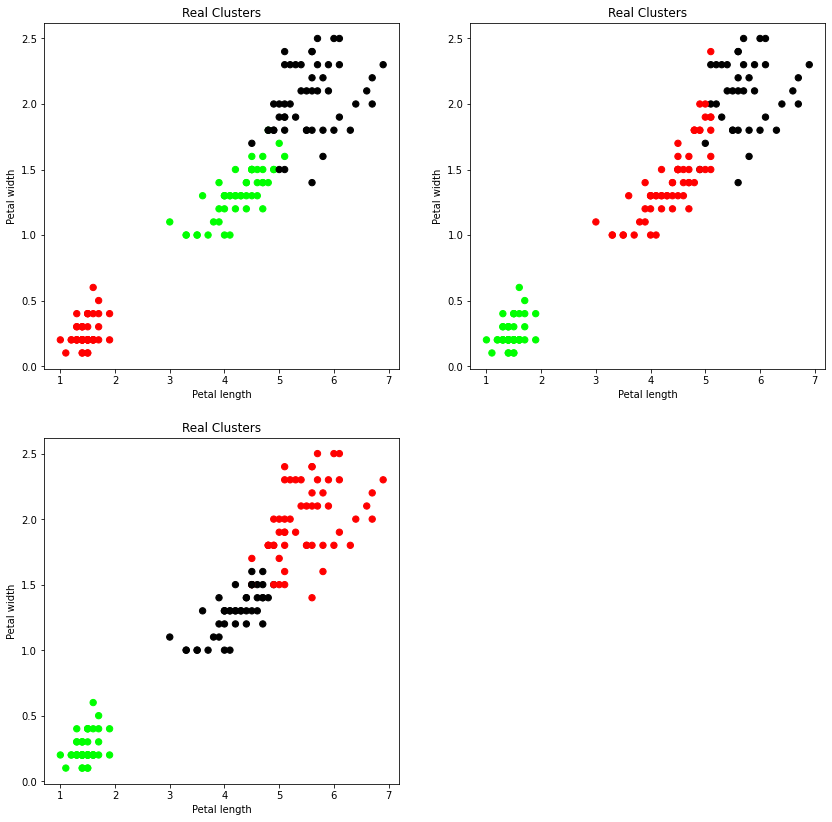

In [63]:
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_iris()
X = pd.DataFrame(dataset.data)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Y = pd.DataFrame(dataset.target)
Y.columns = ['Targets']
colormap = np.array(['red', 'lime', 'black'])
plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[Y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

model = KMeans(n_clusters=3)
model.fit(X)
plt.subplot(2, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


xscaler = preprocessing.StandardScaler()
xscaler.fit(X)
xsa = xscaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.petal_length, X.petal_width, c=colormap[gmm_y], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


In [76]:
import pandas as pd 

data=pd.read_csv('../data/data.csv')
concepts=np.array(data.iloc[:,0:-1])
targets = np.array(data.iloc[:,-1])

def learn():
    for i, val in enumerate(targets):
        if val ==1:
            break
    specific_h = concepts[i].copy()
    generic_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    
    for i,val in enumerate(concepts):
        for j,new_val in enumerate(val):
            if targets[i] == 1:
                if specific_h[j] != new_val:
                    specific_h[j] = "?"
                    generic_h[j][j] = "?"
            else:
                if generic_h[j][j] != specific_h[j]:
                    generic_h[j][j] = specific_h[j]
                else:
                    generic_h[j][j] = "?"
    count = [i for i, val in enumerate(generic_h) if val == ["?" for i in range(len(specific_h))]]
    for i in enumerate(count):
        generic_h.remove(["?" for i in range(len(specific_h))])
    return specific_h,generic_h
    
final_s,final_g = learn()
print("specific", final_s,sep="\n")
print("generic", final_g, sep="\n")
            

specific
['sunny' 'warm' '?' 'strong' '?' '?']
generic
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', 'strong', '?', '?']]


In [ ]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('../data/play.csv')
features = [feat for feat in data]
features.remove("classification")


class Node:
    def __init__(self):
        self.isLeaf =False
        self.pred = ""
        self.children = []
        self.value = ""


def entropy(examples):
    pos = 0.0
    neg =0.0
    for _, row in examples.iterrows():
        if row["classification"] == "Yes":
            pos +=1
        else:
            neg +=1
    if pos ==0.0 or neg ==0.0:
        return 0.0
    else:
        p = pos/(pos+neg)
        n = neg/(neg+pos)
        return -(p*math.log(p,2) + n * math.log(n,2))


def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    gain = entropy(examples)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
    return gain

def ID3(examples,attrs):
    root = Node()
    max_gain = 0
    max_feat = ""
    for feature in attrs:
        gain = info_gain(examples,feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
    
    root.value = max_feat
    uniq = np.unique(examples[max_feat])
    for u in uniq:
        subdata = examples[examples[max_feat] == u ]
        if entropy(subdata) == 0:
            node = Node()
            node.value = u
            node.isLeaf = True
            node.pred = np.unique(subdata["classification"])
            root.children.append(node)
        else:
            node = Node()
            node.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata,new_attrs)
            node.children.append(child)
            root.children.append(node)
    return root


def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.pred)
    print()
    for child in root.children:
        printTree(child, depth + 1)


root = ID3(data, features)
printTree(root)
